[('y=0.5, z=0.5', 0.3004991680532446)]

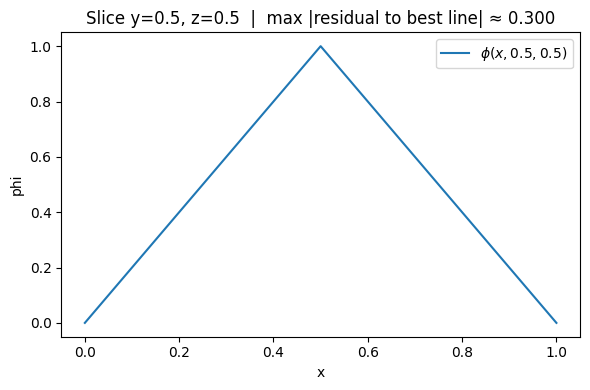

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def relu(x):
    return np.maximum(x, 0.0)

def g3(x):
    return ( 8*relu(x)
            -16*relu(x-1/8)
            +16*relu(x-2/8)
            -16*relu(x-3/8)
            +16*relu(x-4/8)
            -16*relu(x-5/8)
            +16*relu(x-6/8)
            -16*relu(x-7/8)
            + 8*relu(x-1) )

def phi(x, y, z):
    # clip r(t) = ReLU_1(t)
    def r(t): return relu(t) - relu(t-1.0)
    rx, ry, rz = r(x), r(y), r(z)
    S1 = g3(rx/4.0) + g3(ry/4.0) + g3(rz/4.0)
    S2 = g3((rx+ry)/4.0) + g3((ry+rz)/4.0) + g3((rz+rx)/4.0)
    S3 = g3((rx+ry+rz)/4.0)
    return 0.25*(S1 - S2 + S3)

def slice_plot(y0, z0, label):
    xs = np.linspace(0.0, 1.0, 1001)
    vals = np.array([phi(x, y0, z0) for x in xs])

    # Fit best affine line on [0.2, 0.8] to avoid boundary flattening
    mask = (xs >= 0.2) & (xs <= 0.8)
    x_mid = xs[mask]
    v_mid = vals[mask]
    A = np.vstack([x_mid, np.ones_like(x_mid)]).T
    slope, intercept = np.linalg.lstsq(A, v_mid, rcond=None)[0]
    resid = v_mid - (slope * x_mid + intercept)
    max_abs_resid = float(np.max(np.abs(resid)))

    plt.figure(figsize=(6,4))
    plt.plot(xs, vals, label=rf"$\phi(x,{y0},{z0})$")
    plt.title(f"Slice {label}  |  max |residual to best line| ≈ {max_abs_resid:.3f}")
    plt.xlabel("x")
    plt.ylabel("phi")
    plt.legend(loc="best")
    plt.tight_layout()

    return max_abs_resid

results = []
results.append(("y=0.5, z=0.5", slice_plot(0.5, 0.5, "y=0.5, z=0.5")))

results
